# SVM classifier

Dataset = https://www.kaggle.com/rakeshrau/social-network-ads#

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("dark")

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
types = dataset.dtypes.reset_index()
types.columns = ['Index', 'Type']
types

,Index,Type
0,User ID,int64
1,Gender,object
2,Age,int64
3,EstimatedSalary,int64
4,Purchased,int64


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:xlabel='Gender', ylabel='count'>

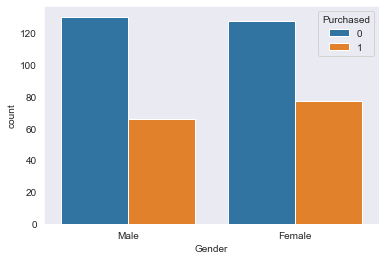

In [21]:
sns.countplot(x = 'Gender', data = dataset, hue = 'Purchased')

<AxesSubplot:xlabel='Purchased', ylabel='count'>

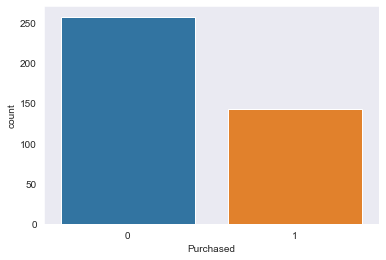

In [25]:
sns.countplot(x = 'Purchased', data = dataset)

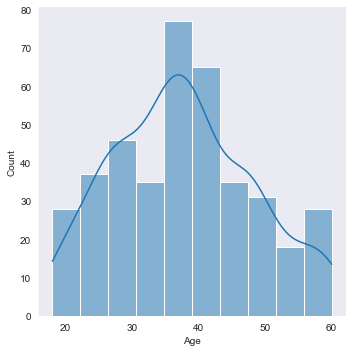

In [22]:
sns.displot(x = 'Age', data = dataset, kde = True)

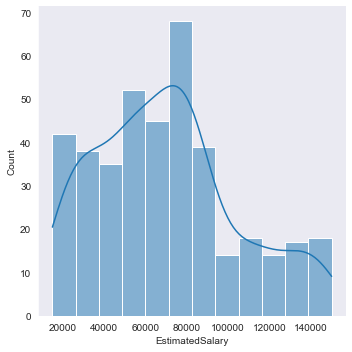

In [23]:
sns.displot(x = 'EstimatedSalary', data = dataset, kde = True)

In [42]:
cm = dataset.corr()
cm

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

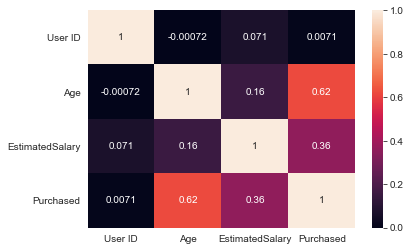

In [43]:
sns.heatmap(cm,annot=True)

In [46]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,4].values

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 0) 

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the model using RBF kernel

In [55]:
from sklearn.svm import SVC

clf = SVC(kernel = 'rbf', random_state = 0)
clf.fit(X_train, y_train)

clf_prediction = clf.predict(X_test)



# Printing classification report

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test, clf_prediction))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



# Confusion matrix

In [59]:
cm = confusion_matrix(y_test, clf_prediction)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

<AxesSubplot:>

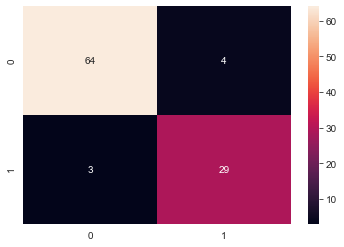

In [60]:
sns.heatmap(cm, annot = True)